> ### EEE3314-02: Introduction to Artificial Intelligence

# Assignment \# II: Lasso Regression

<div style="text-align: right"> **Due date: Oct. 19, 2018.** </div> 
<div style="text-align: right"> **Please upload your file @ yscec by 9 PM in the form of [ID_Name_HW1.ipynb].** </div> 


### *Assignement Instructions:*
- Write a program implementing a particular algorithm to solve a given problem.   
- <h4><span style="color:red">**Report and discuss your results. Analyze the algorithm, theoretically and empirically. **</span> </h4>

### *Collaboration policy:*
- You may discuss the questions.   
- Each student writes their own answers.   
- **Write on your homework anyone with whom you collaborate.**   
- Each student must write their own code (<span style="color:red">**if not you will get a F grade**</span>).

In [1]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2019-02-28 01:09:32.066656


## Problem description

The training set ($\texttt{crime-train.csv}$) consist of local crime statistics for 1,595 communities. We have 95 features to estimate the crime rate denoted by $\texttt{ViolentCrimesPerPop}$. These features include possibly relevant variables such as the size of the police force or the percentage of children that graduate high school. A description of the features in the data set is avaialbe: http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.names.

Let's use the training set to fit a model which can predict the crime rate in new communities, and evaluate model performance on the test set ($\texttt{crime-test.csv}$). The number of featrues and other statistics are exactly the same as the training set. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('crime-train.csv') #put data from crime-train.csv
df = df.values
#print(df.shape)
#print(df)

x = np.delete(df, 0, 1) # make a matrix of input variables(X)
intercept = np.ones((1595,1))
x = np.column_stack([intercept, x])
print(x.shape)
print(x.T)

y = np.array(df[0][0])
for i in range(1,1595):
    y = np.row_stack((y, df[i][0])) #put ViolentCrimesPerPop into y
print(y.shape)
#print(y)
print(x.T[0])

(1595, 96)
[[ 1.    1.    1.   ...  1.    1.    1.  ]
 [-0.45 -0.45 -0.14 ...  0.81  0.18  1.12]
 [-1.85 -0.27  1.87 ... -0.57  0.28  1.93]
 ...
 [-0.56 -0.11  0.77 ...  0.43  0.72  0.33]
 [ 1.26 -0.62  0.52 ...  0.08  0.73 -0.49]
 [-0.39 -0.39 -0.39 ...  3.4   0.52  3.77]]
(1595, 1)
[1. 1. 1. ... 1. 1. 1.]


## Description
pandas를 이용해 crime-train.csv에서 데이터를 불러와 문제를 풀기 알맞게 x(input)와 y(output)를 각각 행렬과 벡터로 만들어주었다.

### I. Lasso method 
(*50 points*) P1.1 As there are a considerable number of input variables, overfitting is a serious issue. In order to avoid this, implement the **coordinate descent LASSO algorithm**. Note that you should consider an additional feature to consider **an intercept term**. Your function should accept a scalar value of the regularization parameter $\lambda$, a vector-valued output variable ($y$), a matrix of input variables ($X$), and an initial vector of weights ($w_0$). It should output a vector of coefficient values ($\hat w$).

> Convergence condition: $||\hat w_t - \hat w_{t+1}||_\infty < 10^{-6}$, i.e., $max(abs(\hat w_t - \hat w_{t+1})) < 10^{-6}$, where $t$ is a number of iteration.      
> Loss function = RSS

(*10 points*) P1.2 Plot training error (sum of squared errorr) over the number of itertaions when $\lambda = 600$.

In [3]:
#set an initial vector of weights
w0 = np.random.normal(0, 1, 96)
w0 = np.array([w0]).T 
print(w0.shape)
#print(w0.T)

(96, 1)


In [4]:
def lasso(lamda, y, x, w0):
    w_hat = w0.copy() #w0를 w_hat에 복사 
    #print(w_hat)
    t = 0 #iteration
    cc = np.ones((96,1)) #while을 처음 실행하기위해 convergence condition(cc)배열을 모두 1로해줌 
    a = []
    err = []
    while(np.max(np.absolute(cc)) > pow(10, -6)): #convergence condition
        for j in range(x.shape[1]): #j=0,1,2,...,D(features)
            z_j = np.dot(x.T[j],(x.T[j]).T)#Normalizer Zj
             
            x_j = x.T[j].reshape(x.T[j].shape[0],1)
            diff = y - np.dot(x,w_hat) + (x_j*w_hat[j][0]) #실제 y값과 jth feature를 빼서 prediction한 y값을 빼준다.
#             print(diff.shape)
            roj = np.dot(x.T[j],diff)[0] #x.T와 위에서 구한 diff를 행렬 곱 연산 진행
            
            if roj < (-lamda/2): # soft thresholding
                wj = (roj + lamda/2)/z_j
            elif roj > (lamda/2):
                wj = (roj - lamda/2)/z_j
            else:
                wj = 0  
            
            cc[j] = w_hat[j][0] - wj #convergence condition을 위해 이전 jth w_hat과 바로구한 roj를 빼준다. 
            w_hat[j] = wj #update jth w_hat
        t += 1 #iteration + 1
        a.append(t) #그래프를 그리기 위해 iteration을 a라는 list에 추가
#       print(w_hat)
        tr_err = np.dot((y - np.dot(x,w_hat)).T, y - np.dot(x,w_hat)) #training error
        err.append(tr_err[0][0]) #training error 리스트 만들기
    print(t,np.count_nonzero(w_hat))
    
    plt.plot(a, err) #P1.2 Plot training error
    plt.show()
    return w_hat

15 1


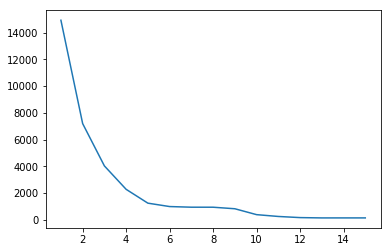

array([[0.04947962],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.   

In [5]:
lasso(600, y, x, w0)

## Description

P1.1
N(0,1)로 w0(coeff)를 initialize해준 후 convergence condition을 이용해서 강의노트 6장 55쪽에 있는 unnormalized features 일 때의 알고리즘을 코드로 구현했다. 중간에 rho를 업데이트하는 과정에서 soft thresholding을 이용했고 수시로 convergence condition(cc)를 체크하면서 수렴을 확인했다. 보다 구체적인 정보는 주석으로 처리했습니다.

P1.2
a = [] err = [] 라는 비어있는 리스트를 만들어 iteration은 a에 append하고 training error는 err에 append해서 2차원 plot을 그렸다.

### II. Regularization parameter 
Initially, set $\lambda=600$, and adjust it by cutting it down by a factor of 2 and run again, until we have models for 10 values of $\lambda$ in total. For each trial, set initial weights to $\mathcal{N}(0,1)$ (Normal random variables with mean 0 and variance 1).   

(*10 points*) P2.1 Plot weights (coefficients) for the features $\texttt{agePct12t29}$, $\texttt{pctWSocSec}$, $\texttt{PctKids2Par}$, $\texttt{PctIlleg}$, and $\texttt{HousVacant}$ over $\log(\lambda)$. That is, plot the coefficient paths.     
(*10 points*) P2.2 Plot training error (sum of squared error) over $\log(\lambda)$.    
(*10 points*) P2.3 Plot test error (sum of squared error) over $\log(\lambda)$.   
(*10 points*) P2.4 Plot number of nonzero weights over $\lambda$.   


In [7]:
def lasso2(lamda, y, x, w0):
    w_hat = w0.copy() #w0를 w_hat에 복사 
    #print(w_hat)
    t = 0 #iteration
    cc = np.ones((96,1)) #while을 처음 실행하기위해 convergence condition(cc)배열을 모두 1로해줌 
    a = []
    err = []
    while(np.max(np.absolute(cc)) > pow(10, -6)): #convergence condition
        for j in range(x.shape[1]): #j=0,1,2,...,D(features)
            z_j = np.dot(x.T[j],(x.T[j]).T)#Normalizer Zj
             
            x_j = x.T[j].reshape(x.T[j].shape[0],1)
            diff = y - np.dot(x,w_hat) + (x_j*w_hat[j][0]) #실제 y값과 jth feature를 빼서 prediction한 y값을 빼준다.
            roj = np.dot(x.T[j],diff)[0] #x.T와 위에서 구한 diff를 행렬 곱 연산 진행
            
            if roj < (-lamda/2): # soft thresholding
                wj = (roj + lamda/2)/z_j
            elif roj > (lamda/2):
                wj = (roj - lamda/2)/z_j
            else:
                wj = 0  
            
            cc[j] = w_hat[j][0] - wj #convergence condition을 위해 이전 jth w_hat과 바로구한 roj를 빼준다. 
            w_hat[j] = wj #update jth w_hat
        t += 1 #iteration + 1
 
    print(t,np.count_nonzero(w_hat))
    
    return w_hat

In [15]:
#P2.1
lamda_list = []
for i in range(10):
    lamda_list.append(600 // 2**i)
w4 = []
w13 = []
w40 = []
w46 = []
w67 = []
for i in lamda_list:
    w = lasso2(i, y, x, w0)
    w4.append(w[4]) 
    w13.append(w[13])
    w40.append(w[40])
    w46.append(w[46])
    w67.append(w[67])

[600, 300, 150, 75, 37, 18, 9, 4, 2, 1]
15 1
54 3
59 5
105 7
127 12
197 18
303 28
532 48
1102 65
1524 77


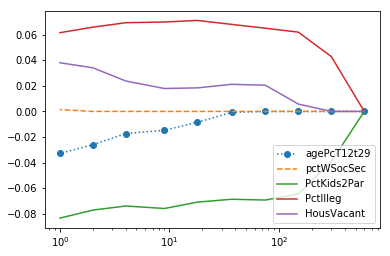

In [16]:
plt.plot(lamda_list,w4, label = 'agePcT12t29', ls = 'dotted', marker='o')
plt.plot(lamda_list,w13, label ='pctWSocSec', ls = '--')
plt.plot(lamda_list,w40, label ='PctKids2Par')
plt.plot(lamda_list,w46, label ='PctIlleg')
plt.plot(lamda_list,w67, label ='HousVacant')
plt.legend()
plt.xscale('log')
plt.show()

## Description

problem 2를 풀기위해 P1.2과정을 뺀 lasso2를 만들었다. lamda_list를 통해 for-loop를 돌리면서 문제에서 필요한 features의 coeffiicient값을 람다가 변할 때마다 각각 w4, w13, w40, w46, w67에 append시켜 그래프를 그려주었다. 람다가 증가할수록 0에 수렴하는 것을 볼 수 있다.

In [21]:
#P2.2
w = []
for i in lamda_list:
    print(i)
    w.append(lasso2(i, y, x, w0))

600
15 1
300
54 3
150
59 5
75
105 7
37
127 12
18
197 18
9
303 28
4
532 48
2
1102 65
1
1524 77


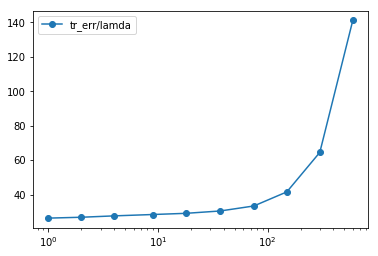

In [20]:
tr_err = []
for i in range(len(lamda_list)):
    err = np.dot((y - np.dot(x,w[i])).T, y - np.dot(x,w[i]))[0][0]
    tr_err.append(err)
plt.plot(lamda_list, tr_err, label = 'tr_err/lamda', marker = 'o')
plt.legend()
plt.xscale('log')
plt.show()

## Description

w = [w57, w60, w75, w150, w300, w600] 에 람다의 변화에 따른 모든 return값인 w_hat을 추가해주었다. training error를 P1.2에서 사용한 공식을 그대로 이용해서 sum of squared error로 구했다. 람다가 증가할 수록 training error가 증가하는 것을 볼 수 있다.

In [22]:
#P2.3 Plot test error (sum of squared error) over log(λ).
df_test = pd.read_csv('crime-test.csv') #put data from crime-test.csv
df_test = df_test.values
print(df_test.shape)
x_test = np.delete(df_test, 0, 1) # make a matrix of input variables(X_test)
intercept_test = np.ones((399,1))
x_test = np.column_stack([intercept_test, x_test])
# print(x_test.shape)
# print(x_test.T)

y_test = np.array(df_test[0][0])
for i in range(1,399):
    y_test = np.row_stack((y_test, df_test[i][0])) #put ViolentCrimesPerPop into y_test
# print(y_test)

(399, 96)


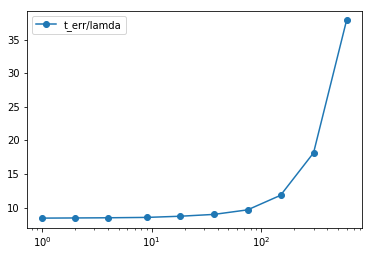

In [23]:
t_err = []
for i in range(len(lamda_list)):
    err = np.dot((y_test - np.dot(x_test,w[i])).T, y_test - np.dot(x_test,w[i]))[0][0]
    t_err.append(err)
plt.plot(lamda_list, t_err, label = 't_err/lamda', marker = 'o')
plt.legend()
plt.xscale('log')
plt.show()

## Description

crime-test.csv에서 데이터를 불러와 P2.2와 같은 방법으로 error를 구했다. 그래프는 위와 같고 람다가 커질수록 test error도 커지는 것을 볼 수 있다.

[1, 3, 5, 7, 12, 18, 28, 48, 65, 77]


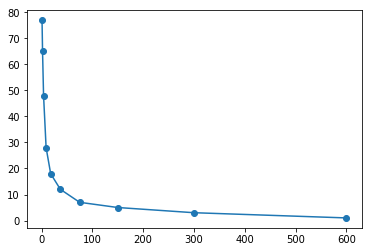

In [24]:
#P2.4 Plot number of nonzero weights over λ.
nonzero = []
for i in range(len(lamda_list)):
    nonzero.append(np.count_nonzero(w[i]))
print(nonzero)
plt.plot(lamda_list, nonzero, marker = 'o')
plt.show()

## Description

w = [w57, w60, w75, w150, w300, w600] 에서 nonzero values를 카운트해 nonzero = []에 append해주고 plot했다. 람다가 커질수록 wj가 0이 되는 경우가 많아지는 것을 볼 수 있다.